# Imagenet 데이터로 사전 훈련된 컨브넷 사용하기 

In [2]:
# 합성곱 기반 층 만들기 
from keras.applications.vgg16 import VGG16

#합성곱 기반 층 
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

2022-02-14 16:55:33.862221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-14 16:55:33.862591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [1]:
# cats_and_dogs 데이터셋 일부만 추출해서 저장
import os, shutil

original_dataset_dir = '/Users/kibeomkim/Documents/GitHub/006975/datasets/cats_and_dogs/train'

base_dir = '/Users/kibeomkim/Desktop/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames : 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames : 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames : 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)




fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames : 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 

fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames : 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames  :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print(f'훈련용 고양이 이미지 전체 개수:{len(os.listdir(train_cats_dir))}')
print(f'훈련용 강아지 이미지 전체 개수:{len(os.listdir(train_dogs_dir))}')
print(f'검증용 고양이 이미지 전체 개수:{len(os.listdir(validation_cats_dir))}')
print(f'검증용 강아지 이미지 전체 개수:{len(os.listdir(validation_dogs_dir))}')
print(f'테스트용 고양이 이미지 전체 개수:{len(os.listdir(test_cats_dir))}')
print(f'테스트용 강아지 이미지 전체 개수:{len(os.listdir(test_dogs_dir))}')

훈련용 고양이 이미지 전체 개수:1000
훈련용 강아지 이미지 전체 개수:1000
검증용 고양이 이미지 전체 개수:500
검증용 강아지 이미지 전체 개수:500
테스트용 고양이 이미지 전체 개수:500
테스트용 강아지 이미지 전체 개수:500


In [5]:
# 합성곱 기반 사용. 데이터 특성만 추출 (분류 하지 않음)
import os 
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np

base_dir = '/Users/kibeomkim/Desktop/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20 

def extract_features(directory, sample_count) : 
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), 
        batch_size=batch_size, 
        class_mode = 'binary')
    i = 0 
    for inputs_batch, labels_batch in generator : 
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch 
        i += 1 
        if i * batch_size >= sample_count : 
            break 
    return features, labels 

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.


ImportError: Image transformations require SciPy. Install SciPy.

In [28]:
# Dense 분류기에 주입 위해 데이터 크기 변형 

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [52]:
# 분류기 정의 및 훈련 

from keras import models 
from keras import layers 
from keras.optimizers import rmsprop_v2


model = models.Sequential() 
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가 
model.add(layers.Dense(1, activation='sigmoid')) # 출력 층 

# 모델 컴파일 

model.compile(
    optimizer = rmsprop_v2.RMSprop(lr=2e-5), 
    loss = 'binary_crossentropy', 
    metrics=['acc'])

# 모델 훈련 

history = model.fit(
    train_features, train_labels,
    epochs=30, 
    batch_size=20, 
    validation_data = (validation_features, validation_labels))

Epoch 1/30
  1/100 [..............................] - ETA: 30s - loss: 0.8630 - acc: 0.5500

2022-02-13 16:12:35.963079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 11ms/step - loss: 0.5757 - acc: 0.6885 - val_loss: 0.4279 - val_acc: 0.8430
Epoch 2/30
  1/100 [..............................] - ETA: 0s - loss: 0.5599 - acc: 0.7500

2022-02-13 16:12:37.024742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 9ms/step - loss: 0.3904 - acc: 0.8410 - val_loss: 0.3541 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3307 - acc: 0.8640 - val_loss: 0.3233 - val_acc: 0.8670
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2840 - acc: 0.8875 - val_loss: 0.3051 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2600 - acc: 0.8980 - val_loss: 0.2799 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2395 - acc: 0.9075 - val_loss: 0.2877 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2176 - acc: 0.9185 - val_loss: 0.2594 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2108 - acc: 0.9205 - val_loss: 0.2576 - val_acc: 0.8930
Epoch 9/30
100/100 [==============================] - 1s 9ms/step - loss: 0.1909 - acc

In [79]:
model.predict(train_features)[4] 

array([0.9987215], dtype=float32)

In [78]:
train_labels[4]

1.0

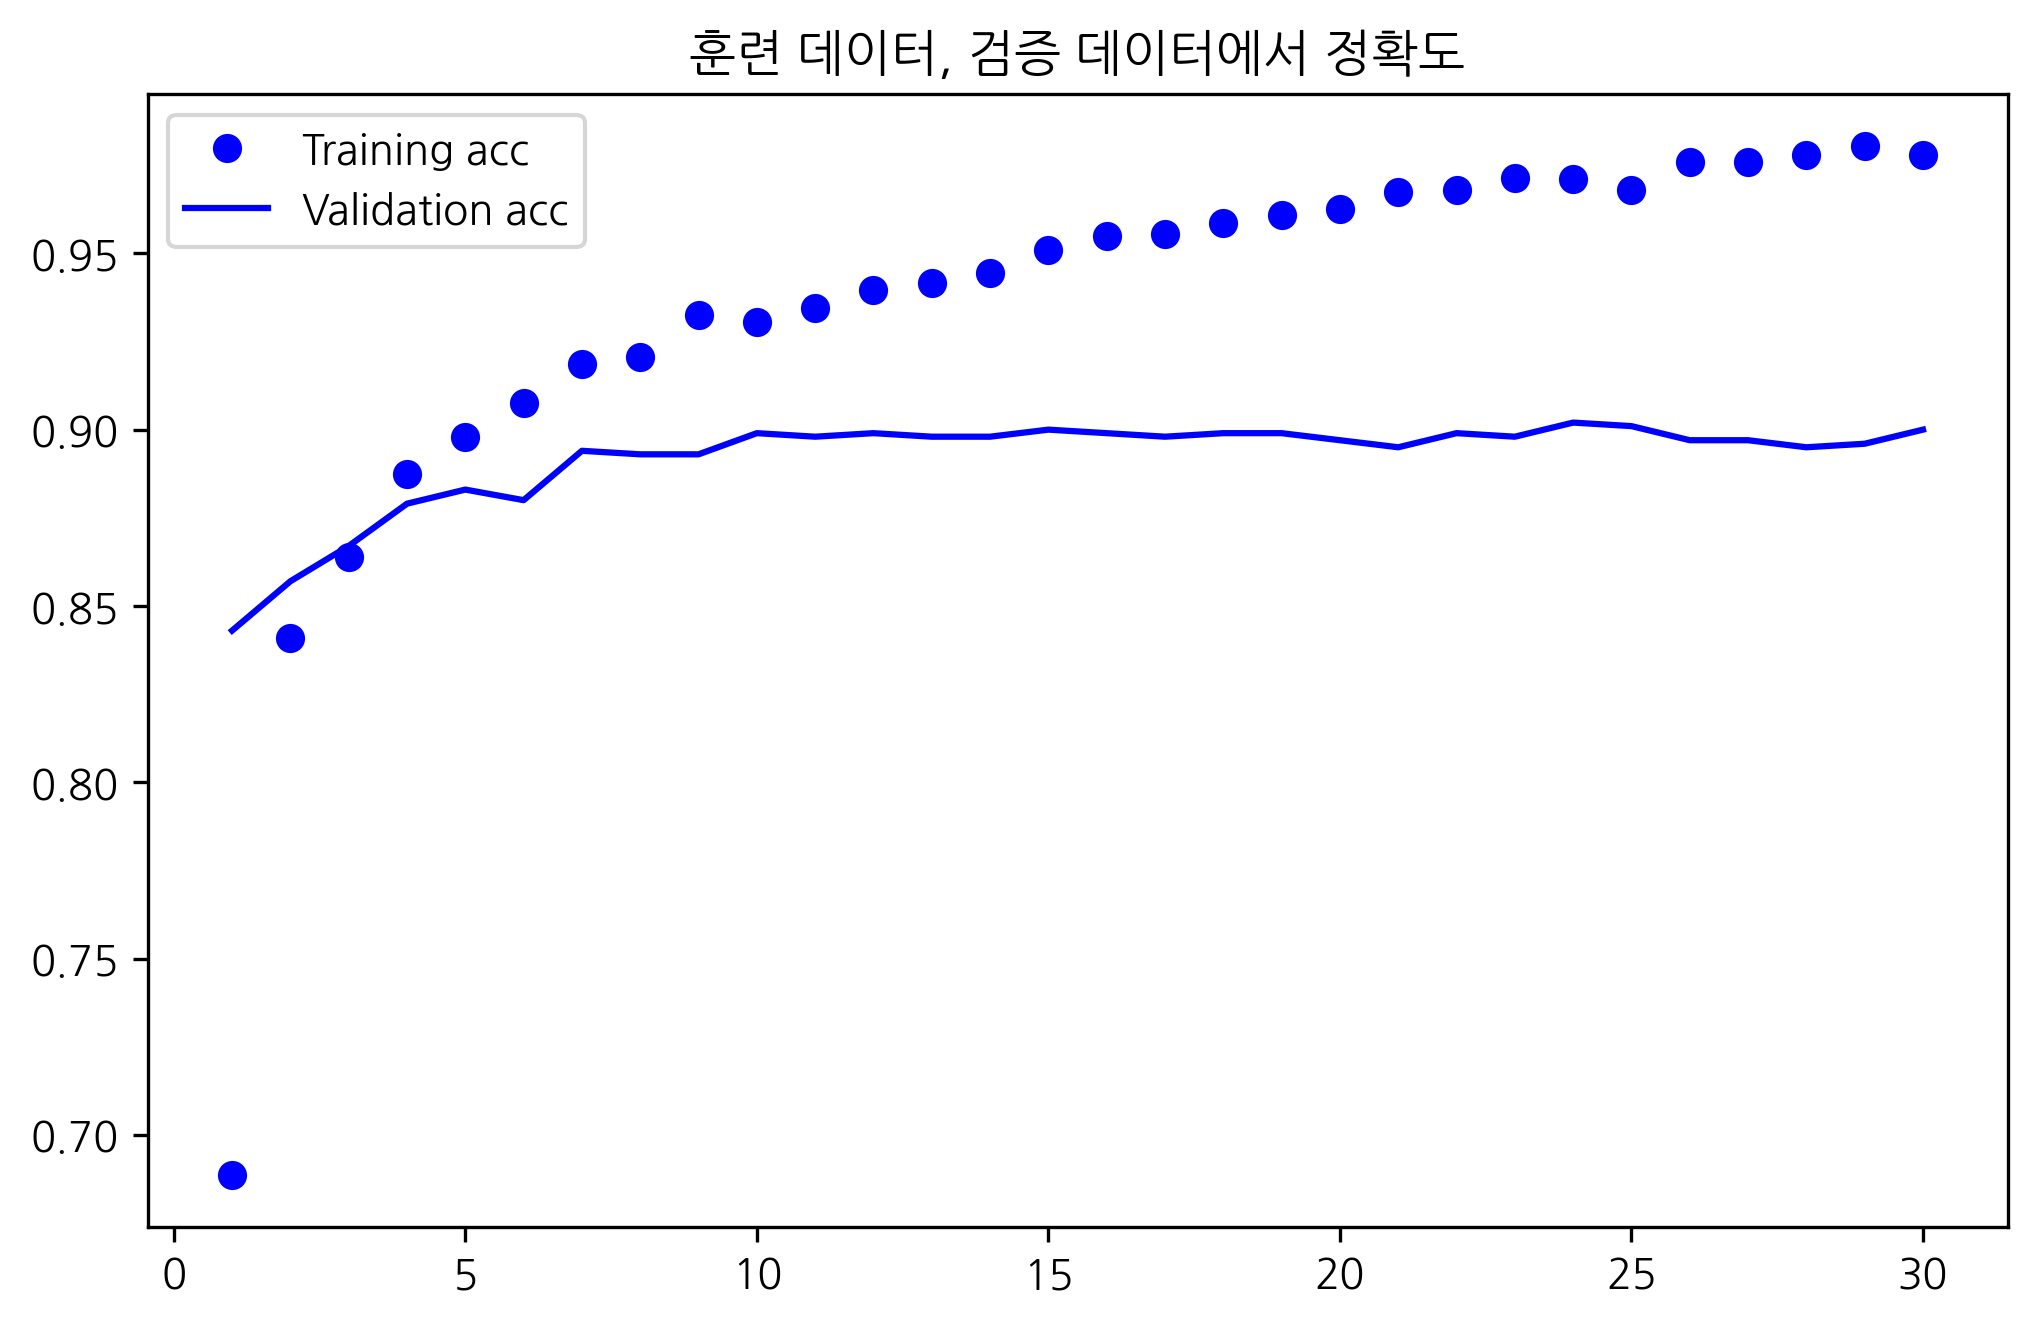

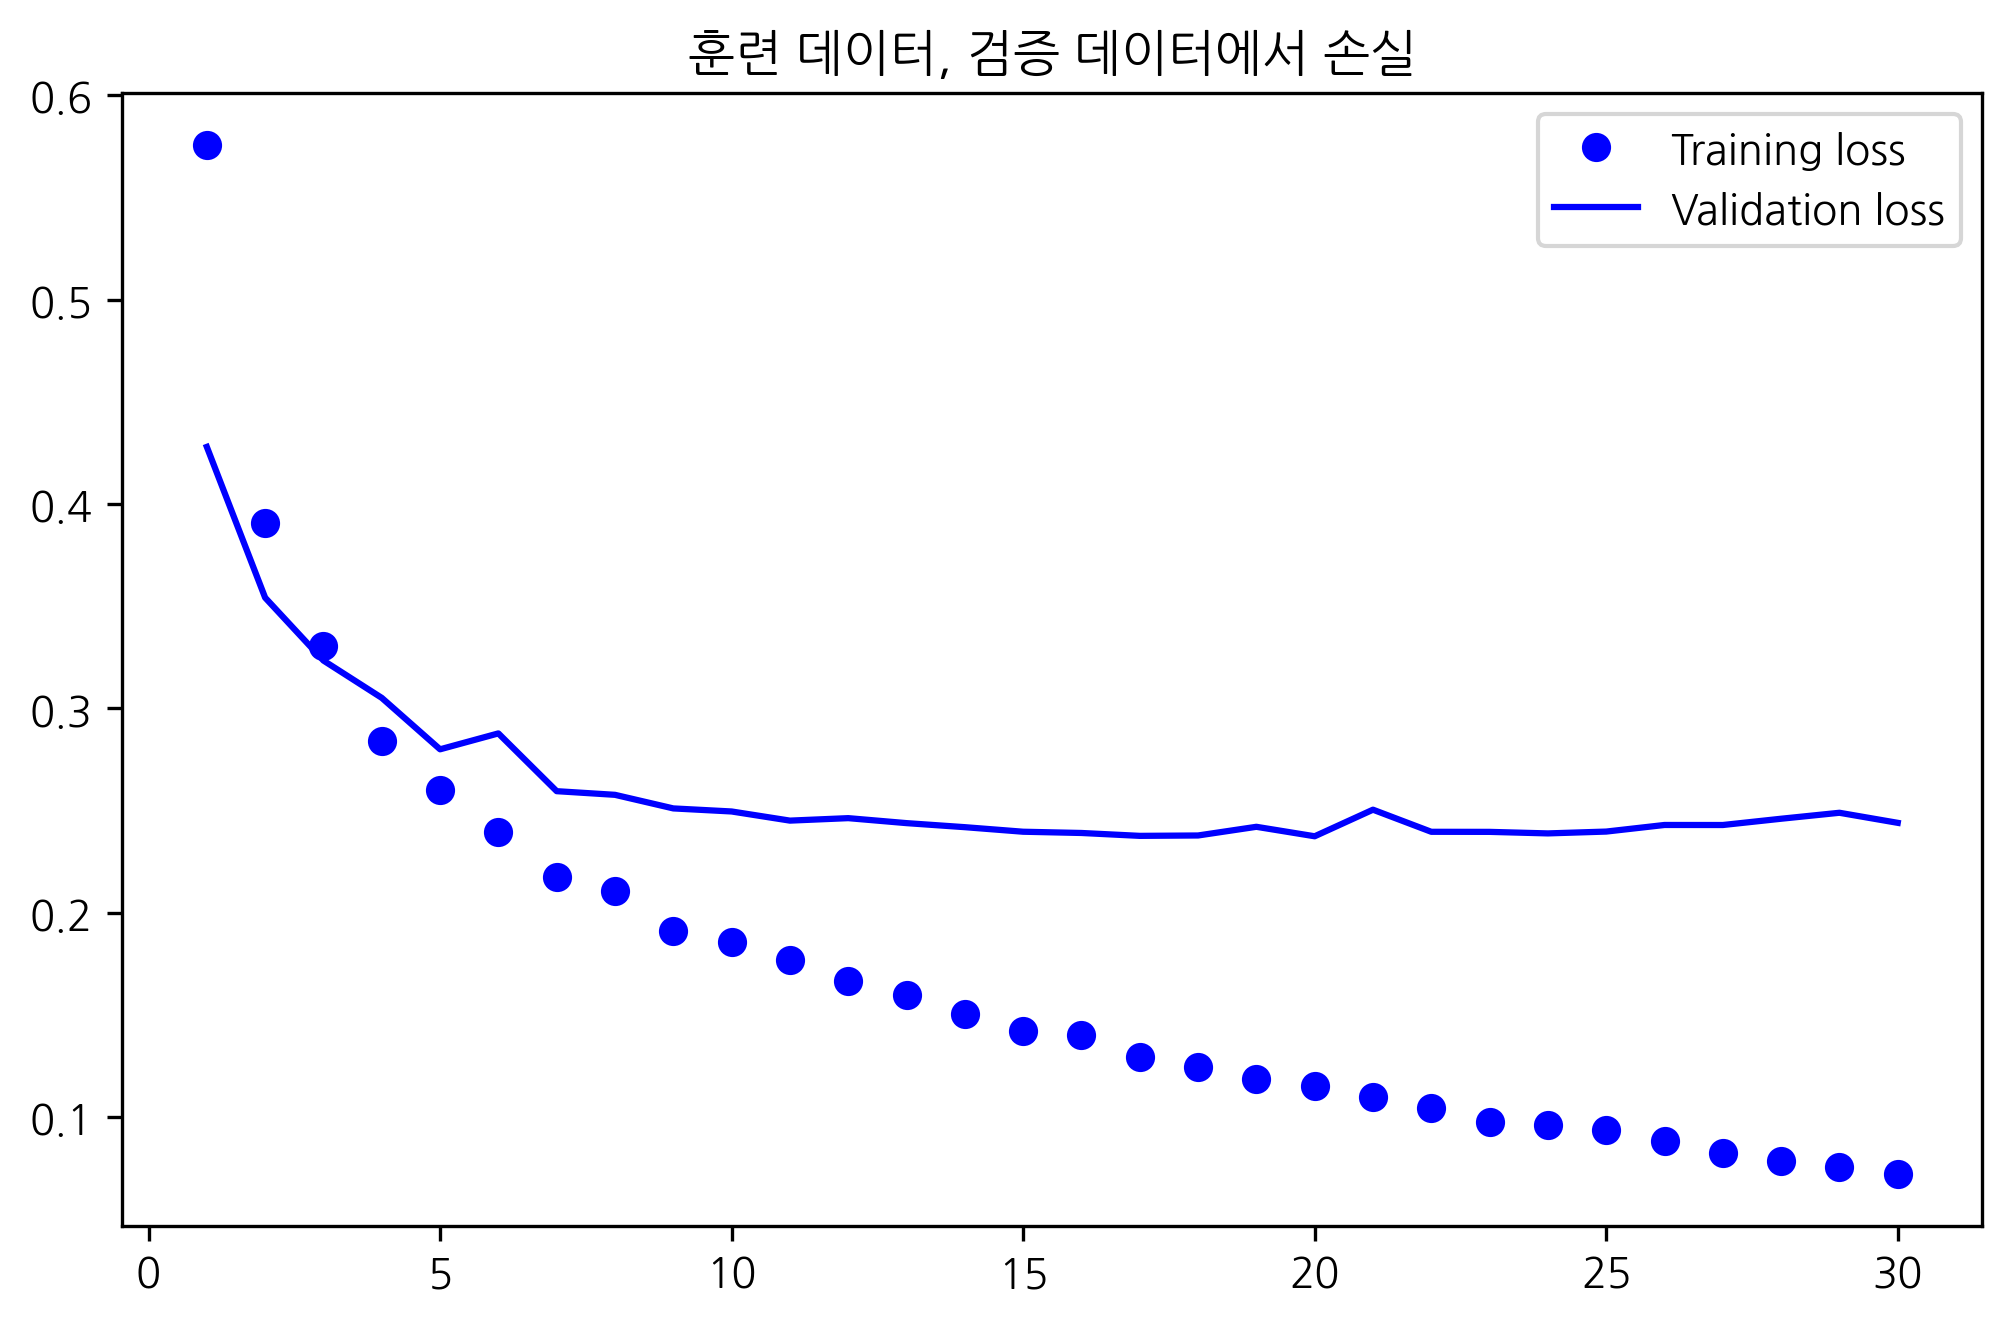

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title(f'훈련 데이터, 검증 데이터에서 정확도')
plt.legend()

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(f'훈련 데이터, 검증 데이터에서 손실')
plt.legend()

plt.show()

# 2. 엔드 투 엔드 방법 
# 특성추출부터 분류까지 한번에 

In [81]:
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) # 데이터 형태 dense층에 맞게 전부 벡터 꼴로 변형 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_37 (Dense)            (None, 256)               2097408   
                                                                 
 dense_38 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [84]:
# 합성 곱 기반 층 가중치 동결 
conv_base.trainable = False # 가중치 동결 
print(f'{len(model.trainable_weights)}')

4


In [87]:
# 데이터 증식 - 과대적합 억제 위함. 

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1, 
    shear_range = 0.1,
    zoom_range = 0.1, 
    horizontal_flip=True, 
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255) # 검증데이터는 증식하지 않는다. 스케일만 변경한다. 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), # 모든 이미지 크기 150*150으로 변경 
    batch_size=20, 
    class_mode='binary' # 강아지 - 고양이 이진 분류 할거다. 따라서 클래스는 이진 형태 되어야 한다. 
) 

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode = 'binary'
)

model.compile(
    loss='binary_crossentropy', 
    optimizer= rmsprop_v2.RMSprop(lr=2e-5),
    metrics = ['acc']
)

history = model.fit_generator(
    train_generator, # 훈련용 데이터 
    steps_per_epoch = 100 ,
    epochs=30,
    validation_data = validation_generator, 
    validation_steps=50, 
    verbose=2 # 학습 과정 출력 생략 
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


2022-02-13 16:43:38.172372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 16:43:54.942028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 - 25s - loss: 0.5306 - acc: 0.7500 - val_loss: 0.3979 - val_acc: 0.8440 - 25s/epoch - 252ms/step
Epoch 2/30
100/100 - 24s - loss: 0.4017 - acc: 0.8250 - val_loss: 0.3250 - val_acc: 0.8740 - 24s/epoch - 237ms/step
Epoch 3/30
100/100 - 24s - loss: 0.3508 - acc: 0.8595 - val_loss: 0.2933 - val_acc: 0.8840 - 24s/epoch - 236ms/step
Epoch 4/30
100/100 - 24s - loss: 0.3269 - acc: 0.8705 - val_loss: 0.2787 - val_acc: 0.8840 - 24s/epoch - 239ms/step
Epoch 5/30
100/100 - 24s - loss: 0.3078 - acc: 0.8690 - val_loss: 0.2692 - val_acc: 0.8900 - 24s/epoch - 239ms/step
Epoch 6/30
100/100 - 24s - loss: 0.2866 - acc: 0.8785 - val_loss: 0.2654 - val_acc: 0.8950 - 24s/epoch - 238ms/step
Epoch 7/30
100/100 - 24s - loss: 0.2775 - acc: 0.8800 - val_loss: 0.2550 - val_acc: 0.8900 - 24s/epoch - 237ms/step
Epoch 8/30
100/100 - 24s - loss: 0.2617 - acc: 0.8960 - val_loss: 0.2492 - val_acc: 0.8980 - 24s/epoch - 237ms/step
Epoch 9/30
100/100 - 24s - loss: 0.2580 - acc: 0.8905 - val_loss: 0.2474 - val_acc:

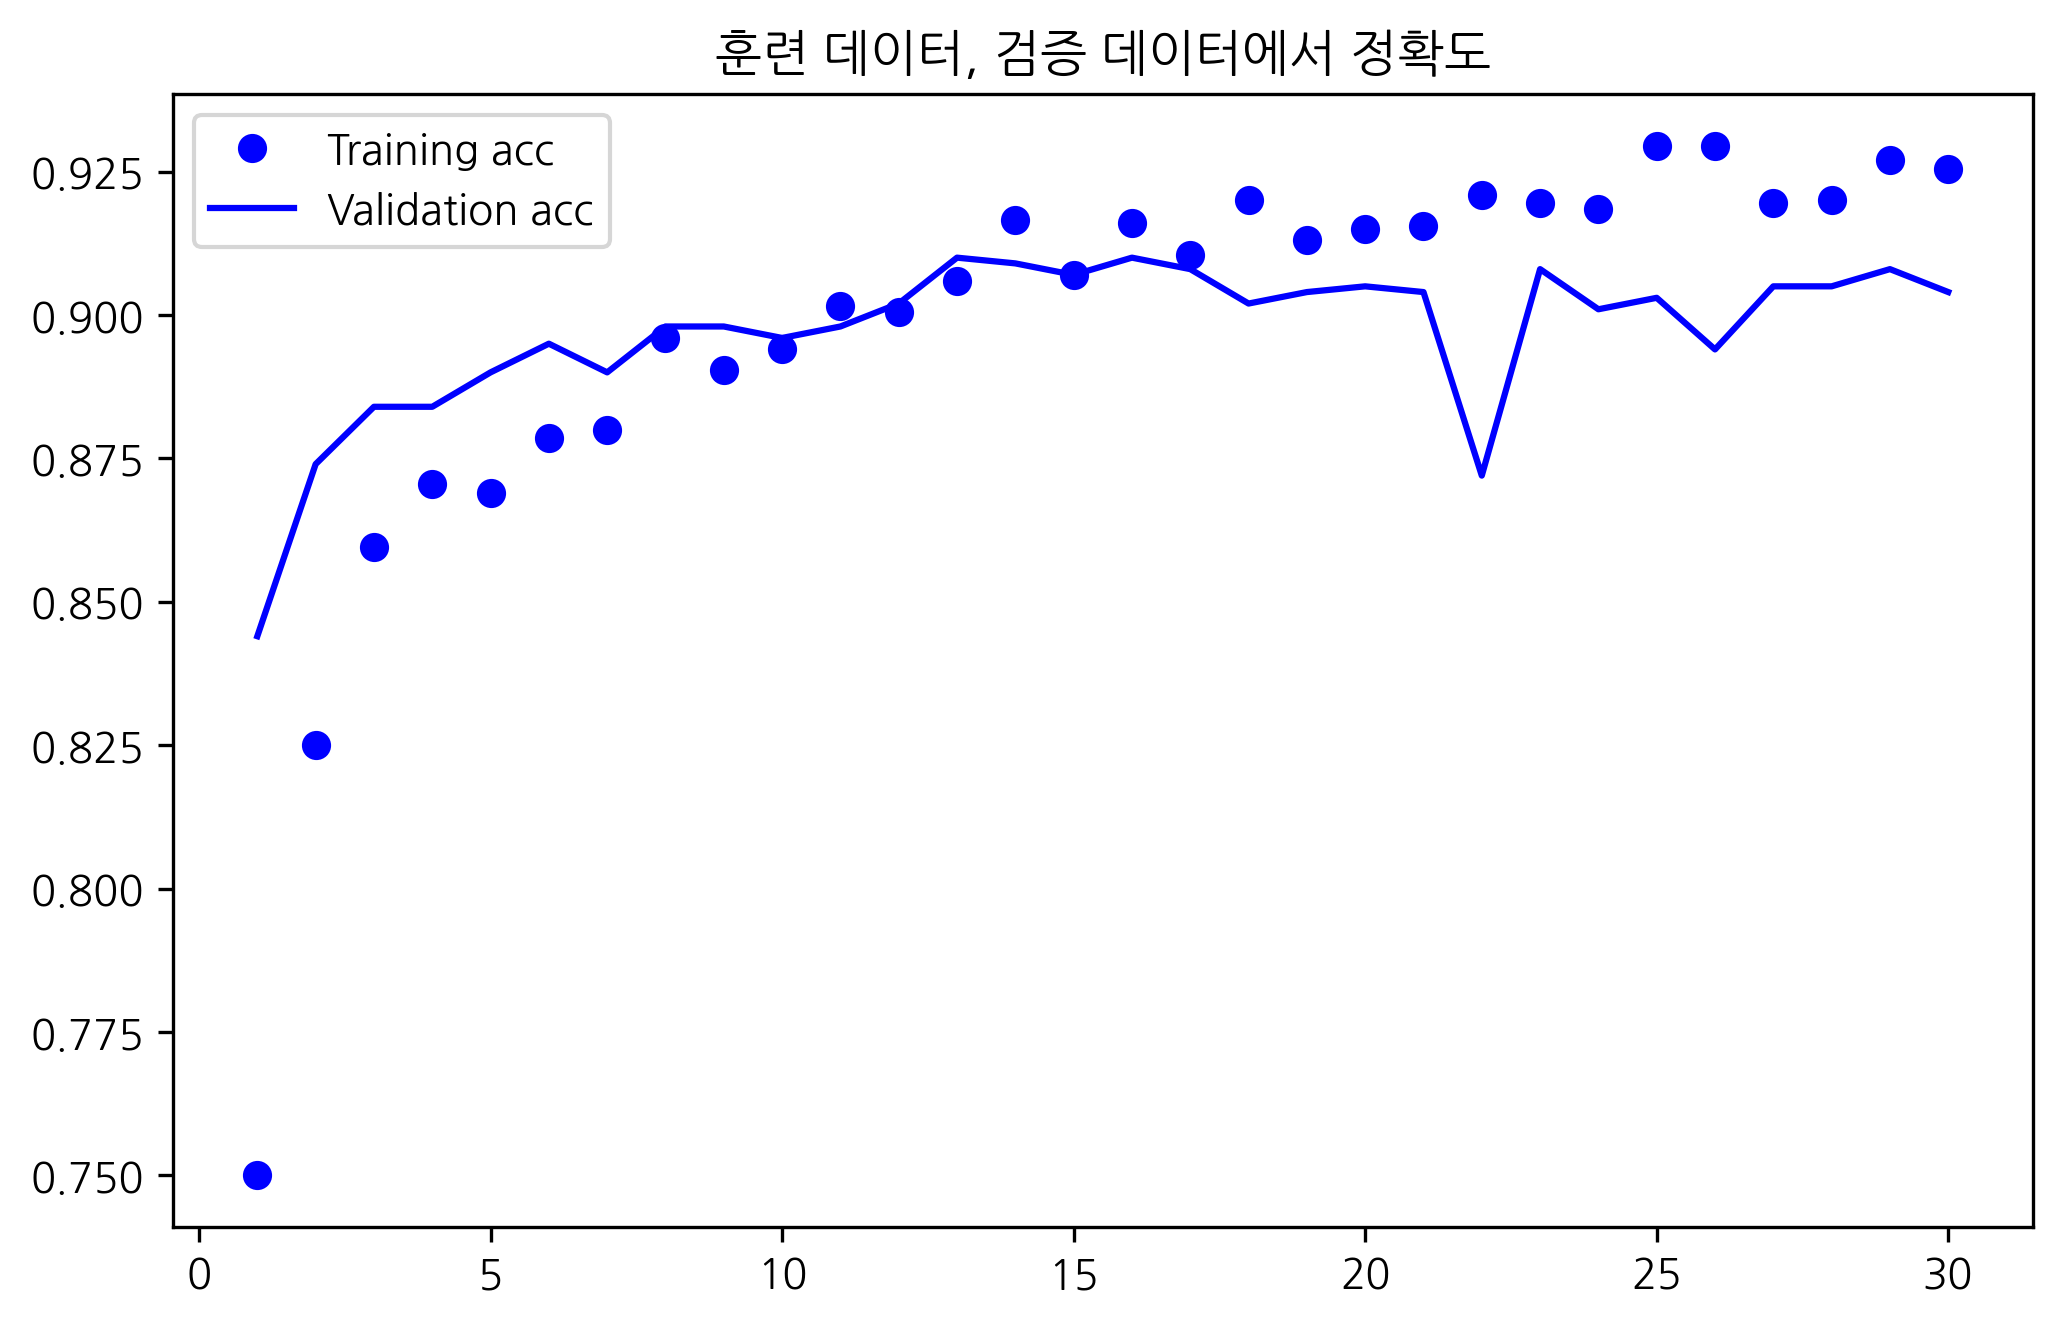

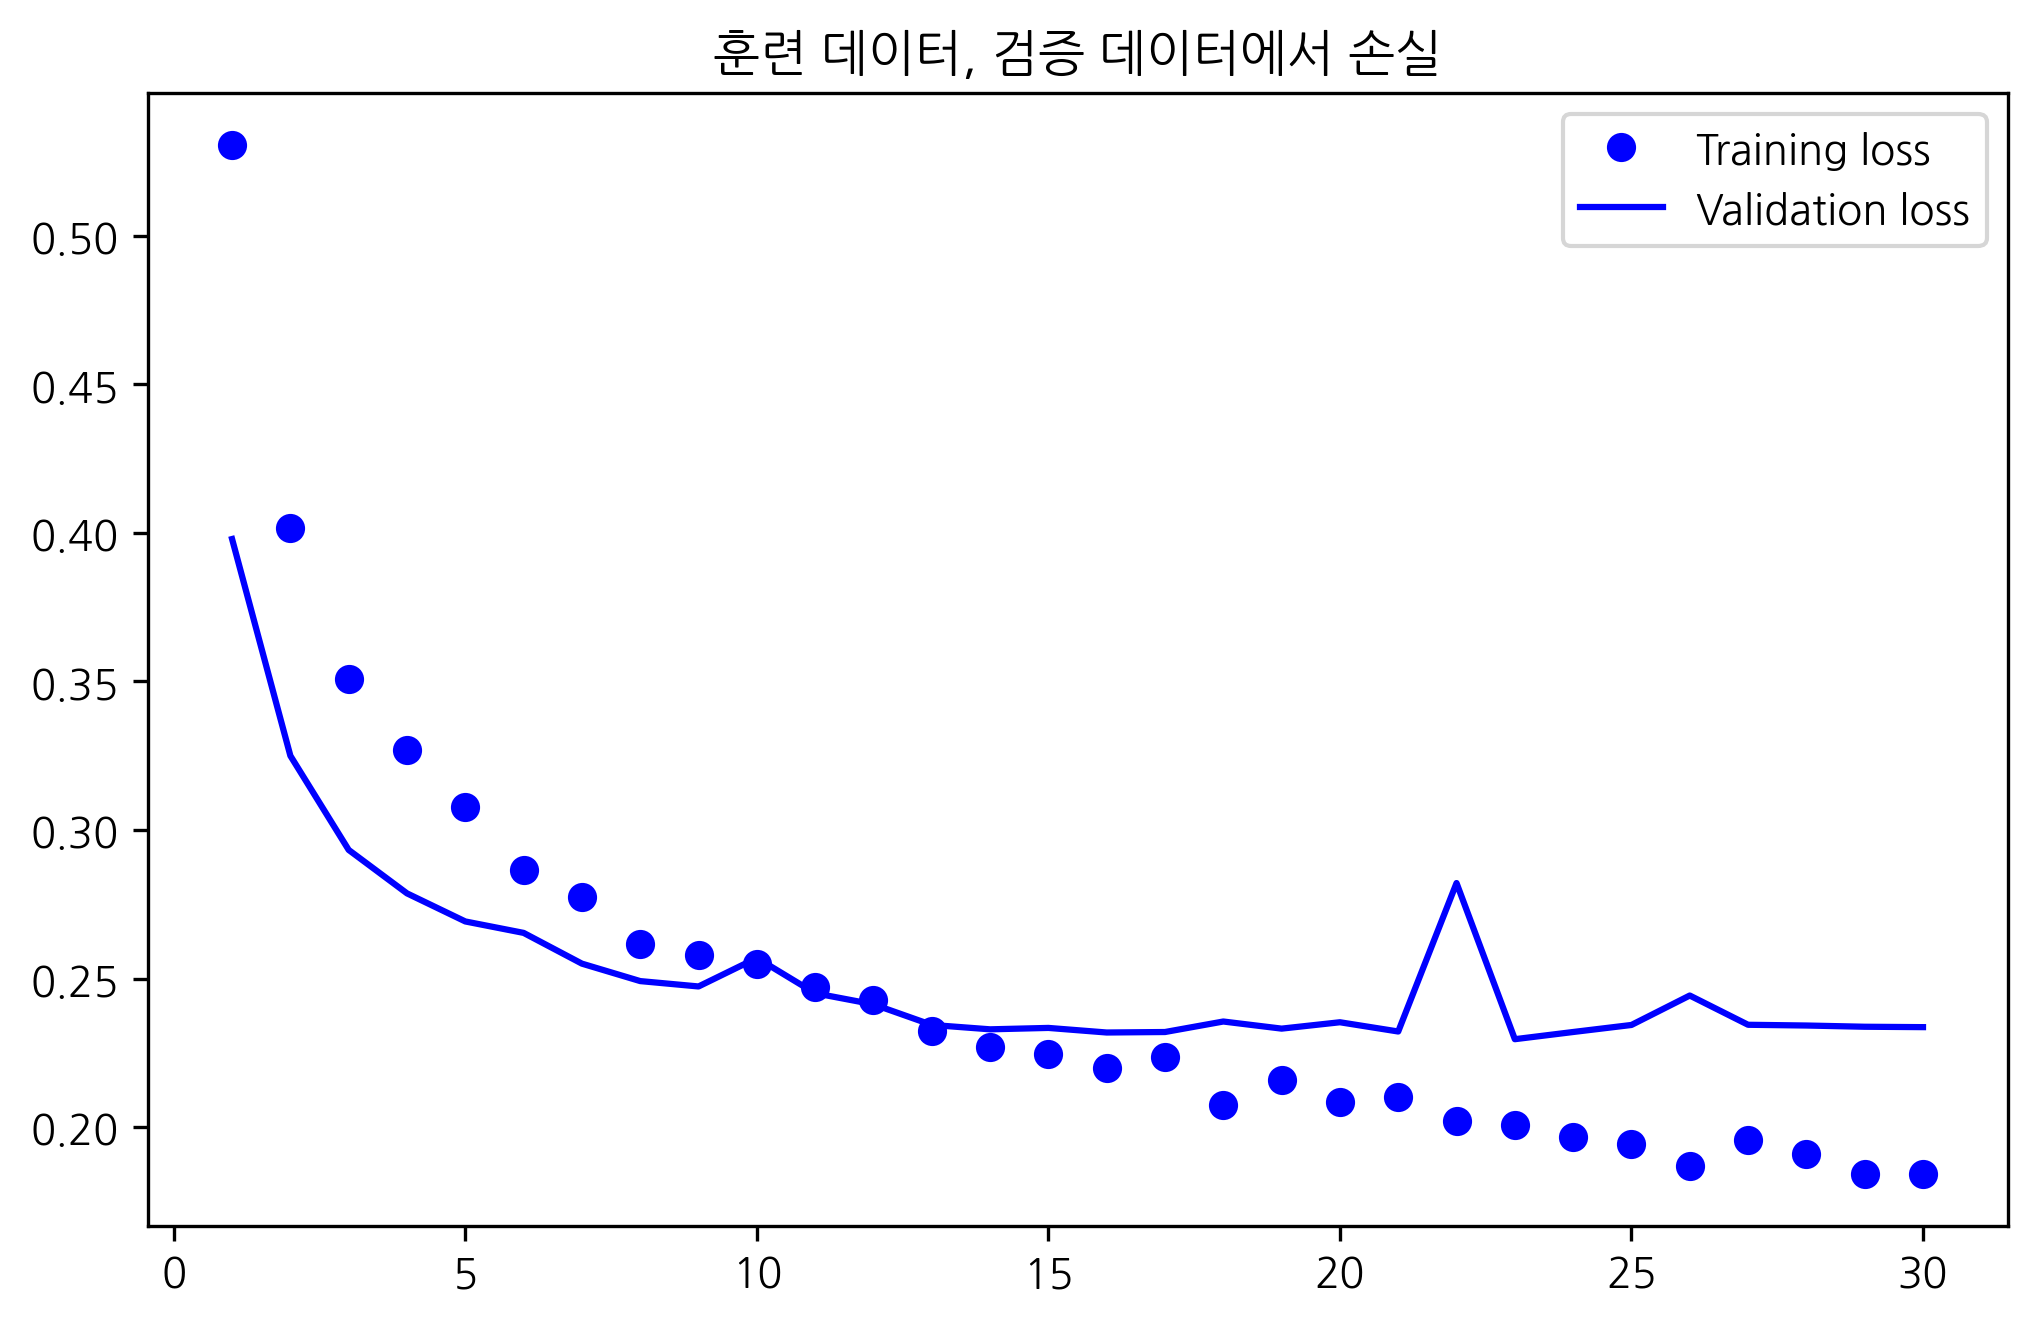

In [88]:
# 결과 시각화 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title(f'훈련 데이터, 검증 데이터에서 정확도')
plt.legend()

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(f'훈련 데이터, 검증 데이터에서 손실')
plt.legend()

plt.show()

# 이 경우 과대적합이 보다 억제됬다.  

# 미세조정 

In [108]:
# 마지막 합성곱 블록만 미세조정 가능하도록 상태 변경, 나머지 합성곱 기반 층은 모두 동결 

conv_base.trainable = True 

set_trainable = False 
for layer in conv_base.layers : 
    if layer.name == 'block5_conv1' : 
        set_trainable = True 
    if set_trainable : 
        layer.trainable = True 
    else : 
        layer.trainable = False 

In [117]:
# 모델 미세 조정 실행 

# 모델 컴파일 
model.compile(
    loss = 'binary_crossentropy', 
    optimizer=rmsprop_v2.RMSprop(lr=1e-5), 
    metrics=['acc']
)

# 모델 훈련하면서 마지막 블록 합성곱 층 미세조정 
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data = validation_generator, 
    validation_steps=50,
    verbose=2 # 진행 경과 표시 안 함. 
)

Epoch 1/100


2022-02-13 17:15:54.021052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-13 17:16:14.775815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 - 29s - loss: 0.1832 - acc: 0.9305 - val_loss: 0.2171 - val_acc: 0.9140 - 29s/epoch - 288ms/step
Epoch 2/100
100/100 - 29s - loss: 0.1516 - acc: 0.9415 - val_loss: 0.2873 - val_acc: 0.8890 - 29s/epoch - 289ms/step
Epoch 3/100
100/100 - 28s - loss: 0.1271 - acc: 0.9490 - val_loss: 0.2076 - val_acc: 0.9200 - 28s/epoch - 283ms/step
Epoch 4/100
100/100 - 29s - loss: 0.1156 - acc: 0.9595 - val_loss: 0.2200 - val_acc: 0.9200 - 29s/epoch - 285ms/step
Epoch 5/100
100/100 - 28s - loss: 0.1148 - acc: 0.9525 - val_loss: 0.2797 - val_acc: 0.9020 - 28s/epoch - 281ms/step
Epoch 6/100
100/100 - 28s - loss: 0.0855 - acc: 0.9685 - val_loss: 0.2175 - val_acc: 0.9270 - 28s/epoch - 282ms/step
Epoch 7/100
100/100 - 28s - loss: 0.0695 - acc: 0.9755 - val_loss: 0.2328 - val_acc: 0.9170 - 28s/epoch - 280ms/step
Epoch 8/100
100/100 - 28s - loss: 0.0642 - acc: 0.9745 - val_loss: 0.2107 - val_acc: 0.9280 - 28s/epoch - 279ms/step
Epoch 9/100
100/100 - 28s - loss: 0.0621 - acc: 0.9780 - val_loss: 0.2305 - 

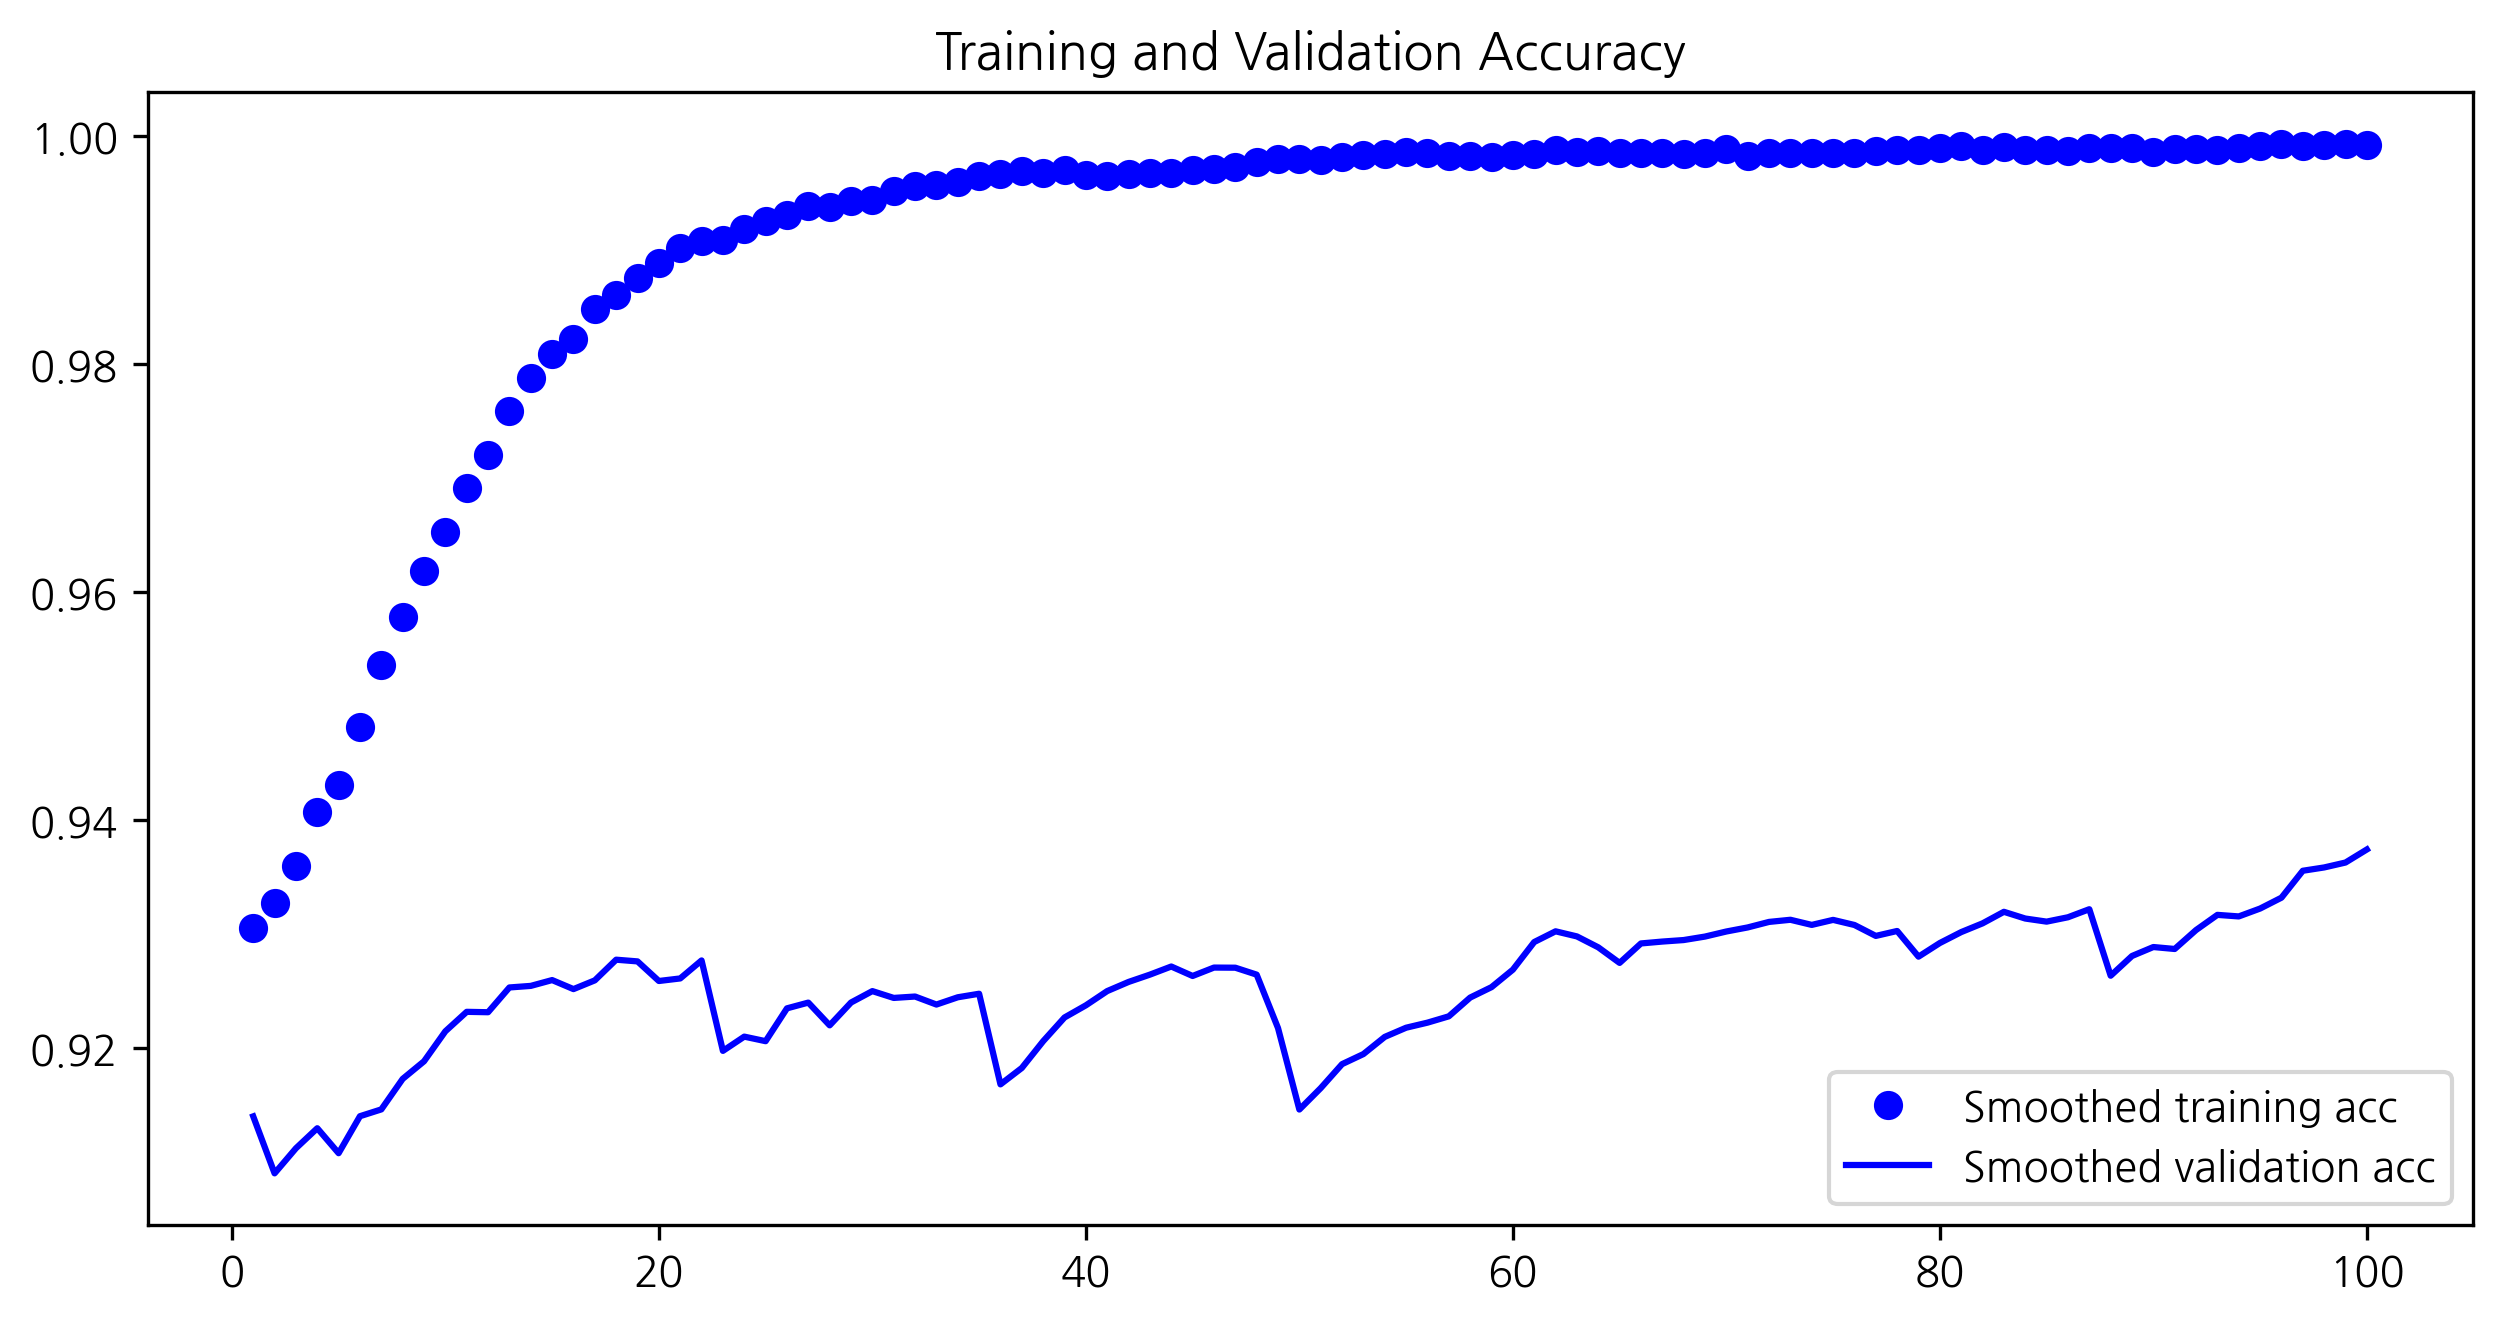

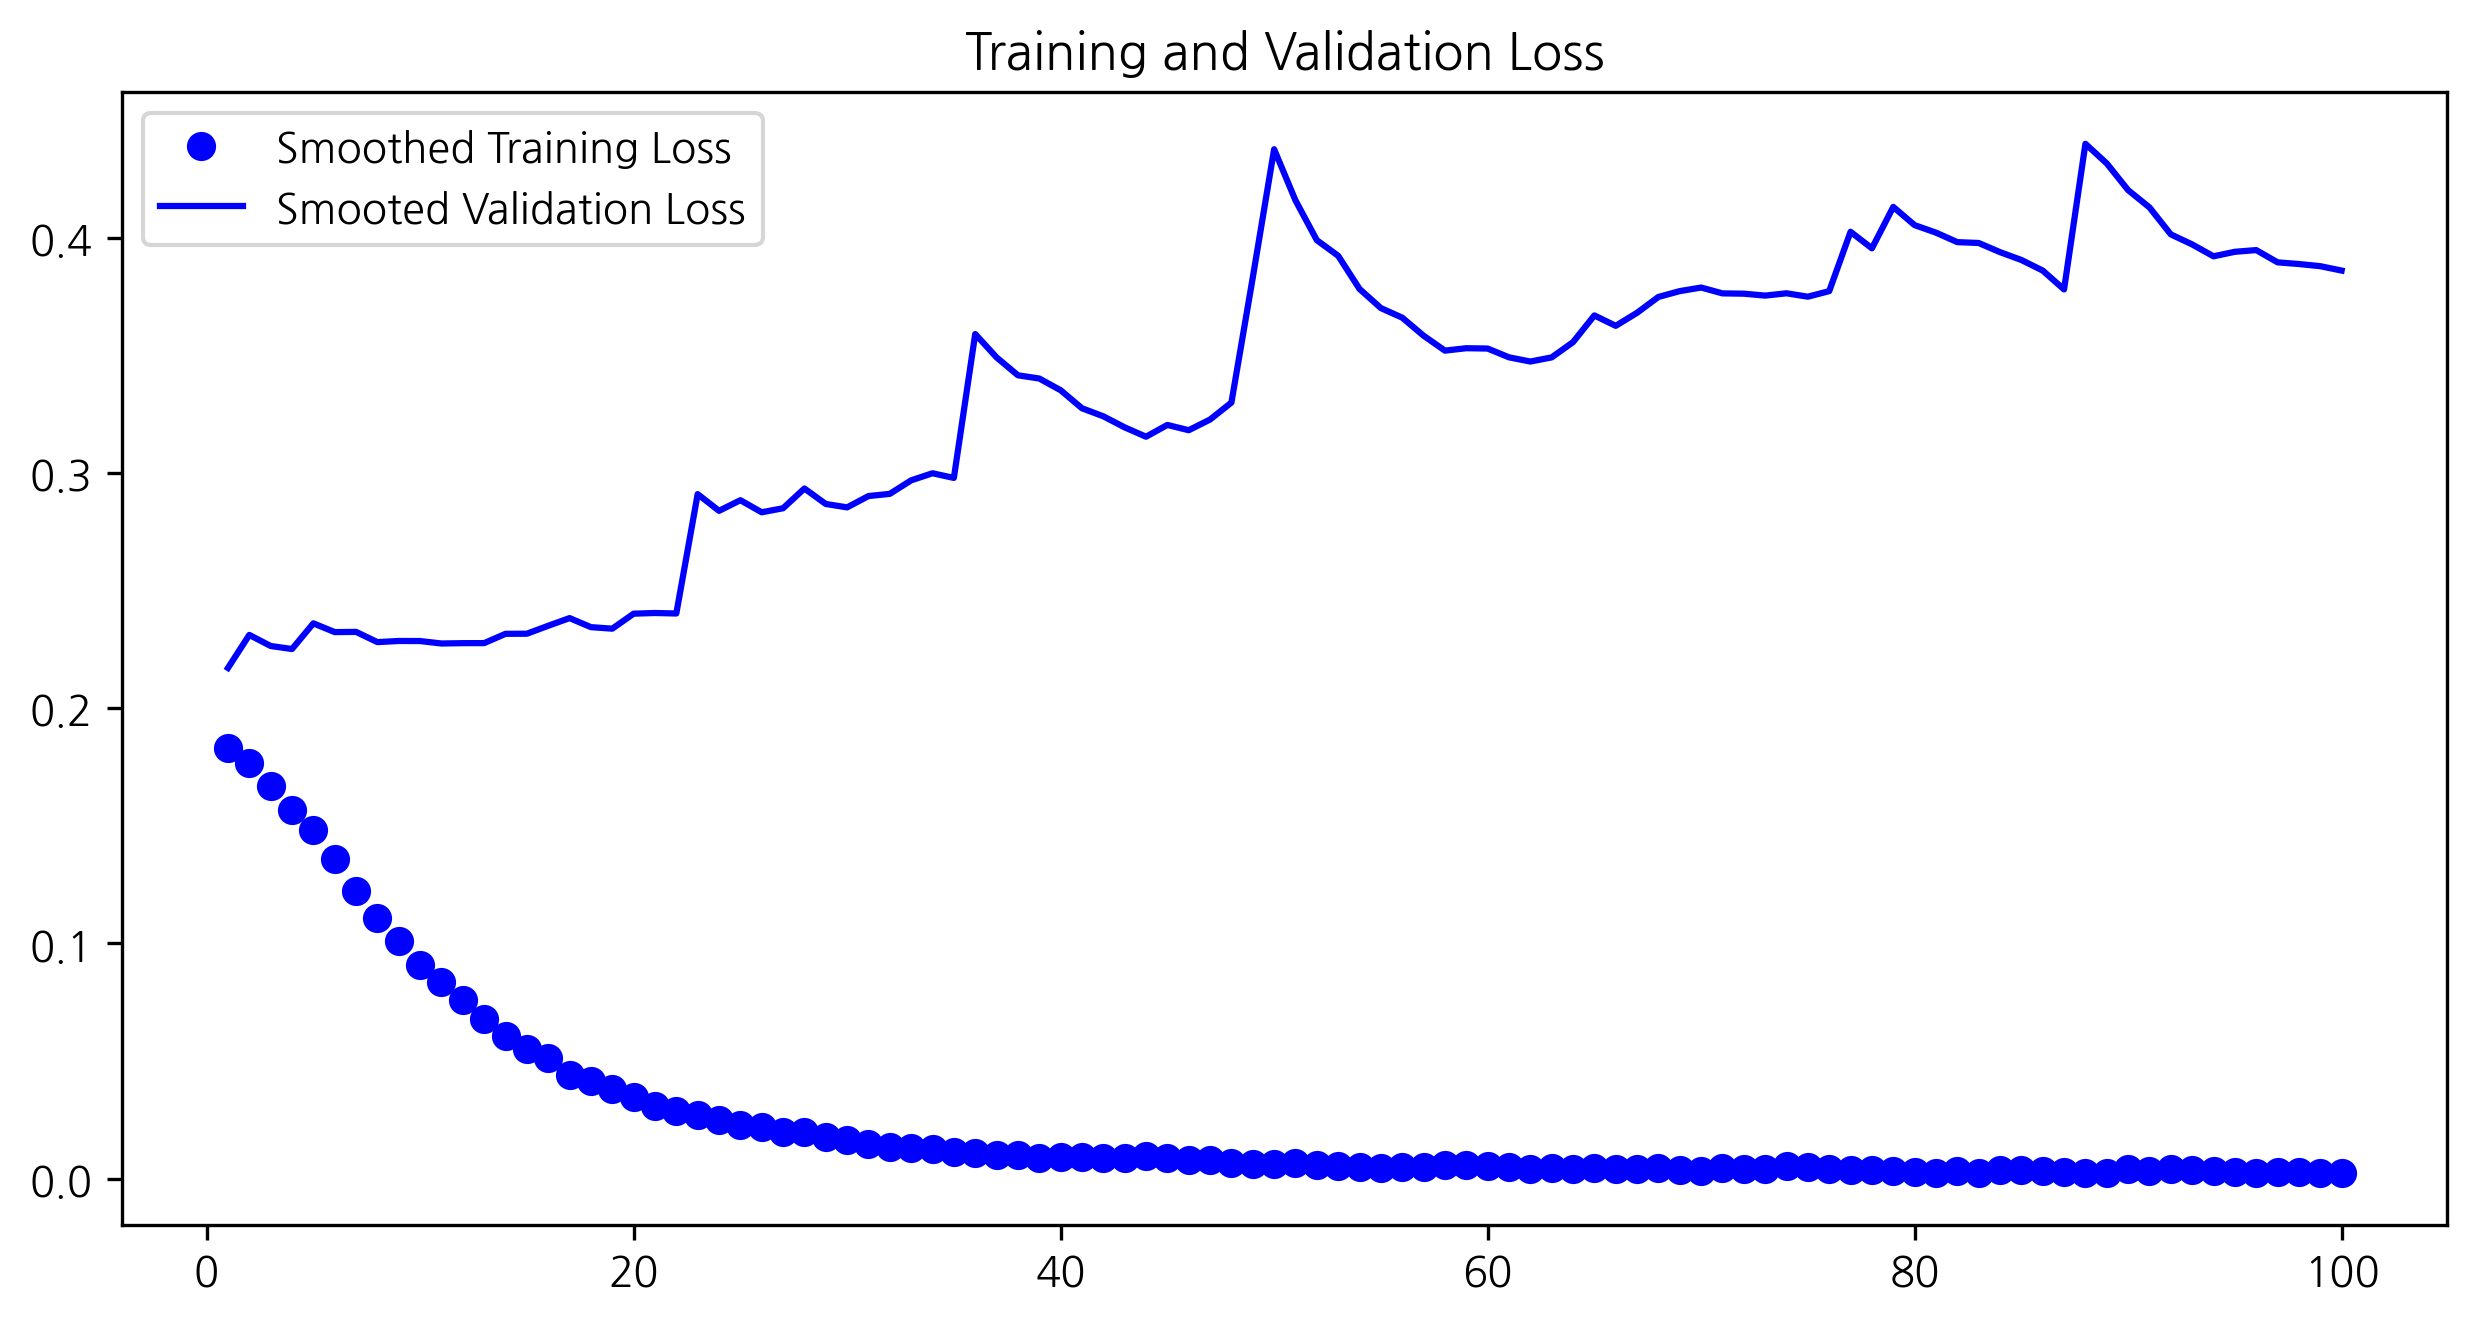

In [120]:
# 훈련 결과 시각화 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# 값들 지수이동평균으로 변환
def smooth_curve(points, factor=0.8) : 
    smoothed_points = [] 
    for point in points : 
        if smoothed_points : 
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor)) 
        else : 
            smoothed_points.append(point)
    return smoothed_points 

plt.figure(figsize=(10, 5))
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and Validation Accuracy')
plt.legend() 

plt.figure(figsize=(10, 5)) 
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed Training Loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smooted Validation Loss')
plt.title('Training and Validation Loss')
plt.legend() 
plt.show()


# 검증 정확도 약 1% 가량 개선되었다. 

In [13]:
import sys
sys.path.append('/Users/kibeomkim/Documents/GitHub/vislab/vislab/datasets')